In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def get_waiting_time(min_wait_time, anom_diff_exp):
    
    R = np.random.uniform(0,1)
    waiting_time = min_wait_time / (R**(1/anom_diff_exp))
    
    return waiting_time

(array([6.58312463e-06, 1.32457236e-08, 6.62286180e-09, 0.00000000e+00,
        1.32457236e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.62286180e-09]),
 array([1.00062884e+00, 1.50993129e+05, 3.01985258e+05, 4.52977386e+05,
        6.03969514e+05, 7.54961643e+05, 9.05953771e+05, 1.05694590e+06,
        1.20793803e+06, 1.35893016e+06, 1.50992229e+06, 1.66091441e+06,
        1.81190654e+06, 1.96289867e+06, 2.11389080e+06, 2.26488293e+06,
        2.41587506e+06, 2.56686718e+06, 2.71785931e+06, 2.86885144e+06,
        3.01984357e+06, 3.17083570e+06, 3.32182783e+06, 3.47281996e+06,
        3.62381208e+06

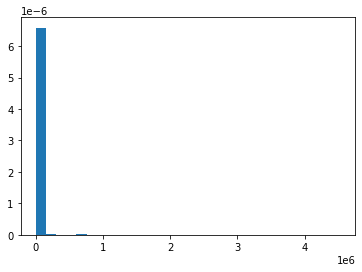

In [6]:
# plotting probability distribution of waiting times as a check
nsamples = 1000
alpha = 0.5  # anomalous diffusion exponent
A = 1  # minimum waiting time in ms 
waiting_times = np.empty((nsamples))
for i in range(nsamples):
    waiting_times[i] = get_waiting_time(A, alpha)
plt.hist(waiting_times, bins=30, density=True)

(array([0.60117302, 0.41544477, 0.28347996, 0.27859238, 0.18572825,
        0.17106549, 0.19550342, 0.15640274, 0.10752688, 0.07331378,
        0.08308895, 0.05865103, 0.09286413, 0.05865103, 0.03910068,
        0.05376344, 0.04887586, 0.04398827, 0.04398827, 0.0342131 ,
        0.04887586, 0.02443793, 0.0342131 , 0.04398827, 0.0342131 ,
        0.00977517, 0.02443793, 0.03910068, 0.0342131 , 0.01466276]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,
         4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,  7.3,
         7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ]),
 <BarContainer object of 30 artists>)

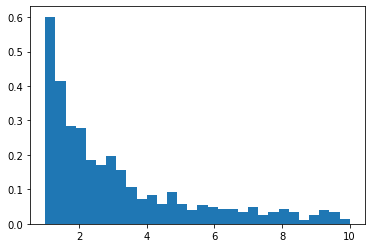

In [7]:
plt.hist(waiting_times, bins=30, range=(A, 10), density=True)

In [8]:
def gaussian_step(D, t, ndim=1):
    
    var = 2*ndim*D*t
    dx = np.random.normal(scale=np.sqrt(var))
    return dx

(array([0.00100867, 0.        , 0.        , 0.00201734, 0.00706069,
        0.00504335, 0.0100867 , 0.02118207, 0.02118207, 0.03126877,
        0.04236414, 0.07565025, 0.05951153, 0.07464158, 0.09380631,
        0.09481498, 0.0907803 , 0.08775429, 0.08271094, 0.04639882,
        0.0504335 , 0.02723409, 0.02925143, 0.02118207, 0.0100867 ,
        0.01210404, 0.00201734, 0.00302601, 0.00403468, 0.00201734]),
 array([-15.42859693, -14.43719242, -13.44578792, -12.45438341,
        -11.46297891, -10.4715744 ,  -9.4801699 ,  -8.48876539,
         -7.49736089,  -6.50595638,  -5.51455188,  -4.52314737,
         -3.53174287,  -2.54033836,  -1.54893386,  -0.55752935,
          0.43387515,   1.42527966,   2.41668416,   3.40808867,
          4.39949317,   5.39089768,   6.38230218,   7.37370669,
          8.36511119,   9.3565157 ,  10.3479202 ,  11.33932471,
         12.33072921,  13.32213372,  14.31353822]),
 <BarContainer object of 30 artists>)

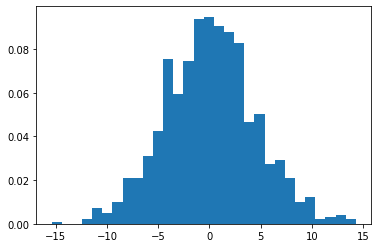

In [9]:
# plotting probability distribution of step lengths as a check
nsamples = 1000
D=10
t=1
step_lengths = np.empty((nsamples))
for i in range(nsamples):
    step_lengths[i] = gaussian_step(D, t)
plt.hist(step_lengths, bins=30, density=True)

In [20]:
# CTRW for single particle in 1D
def ctrw(x_start, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp):
    """
    Be consistent with units
    run_time: simulation time 
    diff_time: diffusion time
    min_wait_time: minimum waiting time
    """
    time = 0
    x = x_start
    times = np.array([time])
    xs = np.array([x])
    while time < run_time:
        waiting_time = get_waiting_time(min_wait_time, anom_diff_exp)
        time += waiting_time  # update current time
        times = np.append(times, time)
        xs = np.append(xs, xs[-1])
        x += gaussian_step(diff_coeff, diff_time)  # update current x position
        times = np.append(times, time)
        xs = np.append(xs, x)
    
    times = times[:-1]
    xs = xs[:-1]
    
    times = np.append(times, run_time)
    xs = np.append(xs, xs[-1])
    
    data = {'t': times, 'x': xs}
    df = pd.DataFrame(data)
    return df

In [21]:
# what units is DaMaRiS diffusion coefficient in?
# times in ps:
df = ctrw(0, 2.8e11, 1, 1e15, 1e9, 0.5)

In [22]:
df

,t,x
0,0.000000e+00,0.000000e+00
1,3.228232e+09,0.000000e+00
2,3.228232e+09,1.502966e+06
3,6.687362e+09,1.502966e+06
4,6.687362e+09,2.011239e+06
...,...,...
2232,9.550869e+14,1.704625e+07
2233,9.550888e+14,1.704625e+07
2234,9.550888e+14,1.671972e+07
2235,2.517684e+15,1.671972e+07


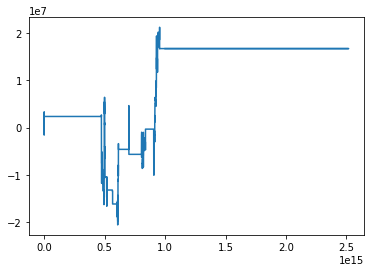

In [23]:
plt.plot(df['t'], df['x'])

In [24]:
def ctrw_3d(initial_position, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp):
    """
    """
    time = 0
    x, y, z = initial_position
    times = np.array([time])
    xs = np.array([x])
    ys = np.array([y])
    zs = np.array([z])
    
    while time < run_time:
        waiting_time = get_waiting_time(min_wait_time, anom_diff_exp)
        time += waiting_time  # update current time
        times = np.append(times, time)
        xs = np.append(xs, xs[-1])
        ys = np.append(ys, ys[-1])
        zs = np.append(zs, zs[-1])
        x += gaussian_step(diff_coeff, diff_time)  # update current x position
        y += gaussian_step(diff_coeff, diff_time)  # update current y position
        z += gaussian_step(diff_coeff, diff_time)  # update current z position
        times = np.append(times, time)
        xs = np.append(xs, x)
        ys = np.append(ys, y)
        zs = np.append(zs, z)
    
    data = {'t': times, 'x': xs, 'y': ys, 'z': zs}
    df = pd.DataFrame(data)
    return df

In [25]:
df_3d = ctrw_3d((0,0,0), 2.8e11, 1, 1e15, 1e9, 0.5)

In [26]:
df_3d

,t,x,y,z
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,4.487308e+10,0.000000e+00,0.000000e+00,0.000000e+00
2,4.487308e+10,4.060372e+03,1.613787e+06,-6.662424e+05
3,4.597175e+10,4.060372e+03,1.613787e+06,-6.662424e+05
4,4.597175e+10,7.717868e+05,1.911082e+06,-1.392227e+04
...,...,...,...,...
1578,3.037601e+14,-6.357677e+06,-1.482679e+07,-7.851048e+06
1579,3.038665e+14,-6.357677e+06,-1.482679e+07,-7.851048e+06
1580,3.038665e+14,-6.462506e+06,-1.473573e+07,-9.205358e+06
1581,1.089636e+15,-6.462506e+06,-1.473573e+07,-9.205358e+06


<IPython.core.display.Javascript object>


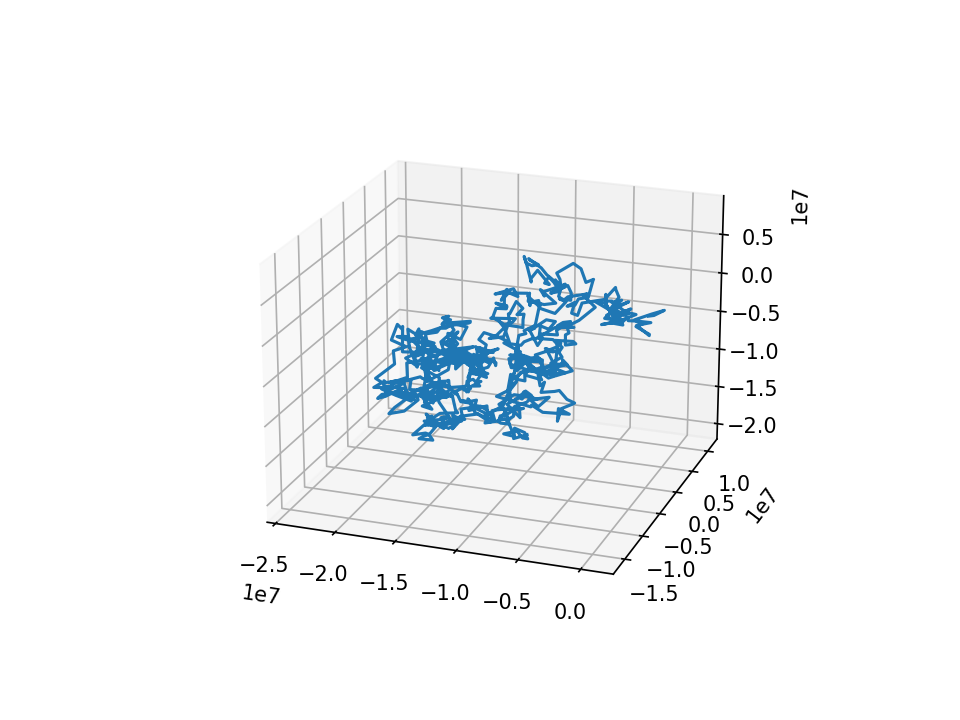

In [30]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot3D(df_3d['x'], df_3d['y'], df_3d['z'])